- Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
test_df = pd.read_csv(r'test_table.csv')
user_df = pd.read_csv(r'user_table.csv')

In [3]:
def simple(df):
    print('df info:')
    print(df.info())
    print('===================\n')
    print(df.describe())

In [4]:
simple(test_df)

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB
None

              user_id     conversion           test
count   453321.000000  453321.000000  453321.000000
mean    499937.514728       0.049579       0.476446
std     288665.193436       0.217073       0.499445
min          1.000000       0.000000       0.000000
25%     249816.000000       0.000000       0.00

In [5]:
simple(user_df)

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB
None

              user_id            age
count   452867.000000  452867.000000
mean    499944.805166      27.130740
std     288676.264784       6.776678
min          1.000000      18.000000
25%     249819.000000      22.000000
50%     500019.000000      26.000000
75%     749543.000000      31.000000
max    1000000.000000      70.000000


#### Difference
453321-452867=454: ignore the small number

In [6]:
df = test_df.merge(user_df, on='user_id', how='inner')
df

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
452862,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50,Mexico
452863,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20,Colombia
452864,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25,Spain
452865,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21,Colombia


In [7]:
verify = df[(df['test'] == 1) & (df['country'] =='Spain')]
verify

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country


no test data belongs to Spain

In [8]:
conversions = df[['country','test','conversion']].groupby(['country','test'],as_index=False).sum()
user_count = df[['country','test','user_id']].groupby(['country','test'],as_index=False).count()
agg = pd.concat([conversions,user_count],axis=1)
agg['conversion_rate']=agg['conversion']/agg['user_id']
agg

,country,test,conversion,country,test,user_id,conversion_rate
0,Argentina,0,141,Argentina,0,9356,0.015071
1,Argentina,1,513,Argentina,1,37377,0.013725
2,Bolivia,0,274,Bolivia,0,5550,0.049369
3,Bolivia,1,267,Bolivia,1,5574,0.047901
4,Chile,0,474,Chile,0,9853,0.048107
5,Chile,1,507,Chile,1,9884,0.051295
6,Colombia,0,1411,Colombia,0,27088,0.052089
7,Colombia,1,1364,Colombia,1,26972,0.050571
8,Costa Rica,0,139,Costa Rica,0,2660,0.052256
9,Costa Rica,1,145,Costa Rica,1,2649,0.054738


the number of user_id count in Argentina and Uruguay has huge difference between test and control data

In [9]:
(len(df[df['country'] == 'Argentina'])+len(df[df['country'] == 'Uruguay']))/len(df)

0.11232216081101074

In [10]:
balance = df[(df['country'] != 'Argentina') & (df['country'] != 'Uruguay') & (df['country'] != 'Spain')]
balance

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
452861,783089,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,F,20,Mexico
452862,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50,Mexico
452863,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20,Colombia
452865,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21,Colombia


In [11]:
test = balance[balance['test'] == 1]
control = balance[balance['test'] == 0]

In [12]:
len(test)

174678

In [13]:
len(control)

175540

In [14]:
conversions_t = test[['conversion','date']].groupby(['date'],as_index=False).mean()
conversions_t

,date,conversion
0,2015-11-30,0.051452
1,2015-12-01,0.047685
2,2015-12-02,0.051157
3,2015-12-03,0.050525
4,2015-12-04,0.050817


In [15]:
conversions_c = control[['conversion','date']].groupby(['date'],as_index=False).mean()
conversions_c

,date,conversion
0,2015-11-30,0.053032
1,2015-12-01,0.048181
2,2015-12-02,0.050185
3,2015-12-03,0.051098
4,2015-12-04,0.048999


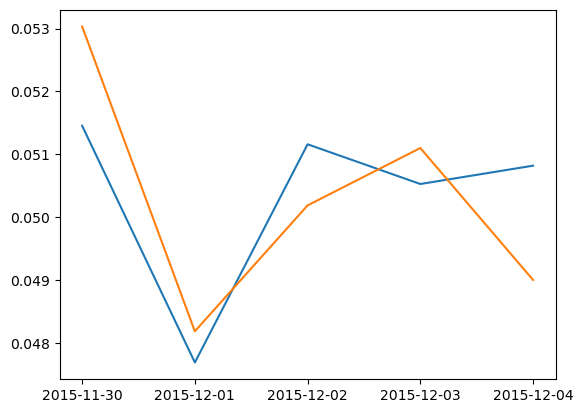

In [16]:
plt.plot(conversions_t['date'],conversions_t['conversion'])
plt.plot(conversions_c['date'],conversions_c['conversion'])

In [17]:
from sklearn.preprocessing import LabelEncoder

for feature in ['browser_language', 'country', 'browser', 'ads_channel', 'device', 'source', 'sex']:
    label = LabelEncoder()
    label.fit(test[feature])
    test[feature] = label.transform(test[feature])

[0.01102035 0.00195249 0.02305738 0.05168415 0.05093423 0.0115255
 0.61064977 0.23917614]


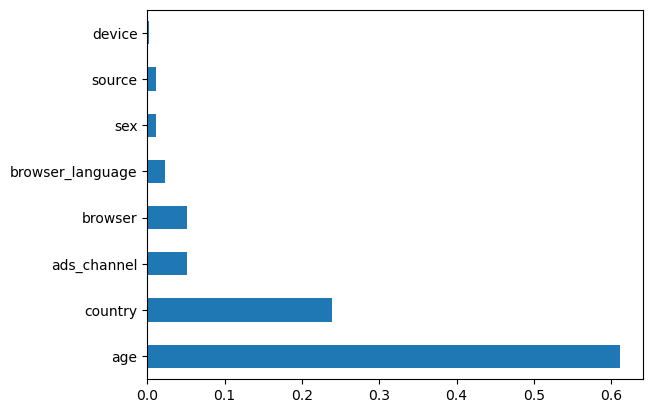

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

X = test[['source','device','browser_language','ads_channel','browser','sex','age','country']]
y = test['conversion']

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def logistic_regression(df, column):

    # Instantiate a gamma family model with the default link function.
    model = sm.GLM(test['conversion'], sm.add_constant(df[column]), family=sm.families.Binomial())
    results = model.fit()
    return results.summary()

In [20]:
logistic_regression(test,'age')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             conversion   No. Observations:               174678
Model:                            GLM   Df Residuals:                   174676
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34888.
Date:                Thu, 15 Dec 2022   Deviance:                       69776.
Time:                        17:23:58   Pearson chi2:                 1.75e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          1.098e-06
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9166      0.045    -64.467      0.000      -3.005      -2.828
age           -0.0007      0.002     -0.438      0.662      -0.004       0.002
==============================================================================
"""

Results:
- converted = -0.0007*age -2.9166
- OR = e^-0.0007 = 0.9993002449
- OR < 1: age increase, conversion rate decrease 0%

Ref:
- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e